### LeNet 구조

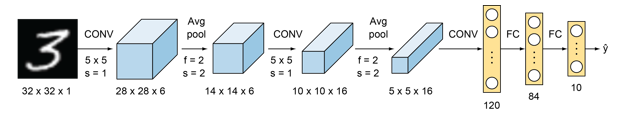

In [24]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [25]:
# MNIST 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)


In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

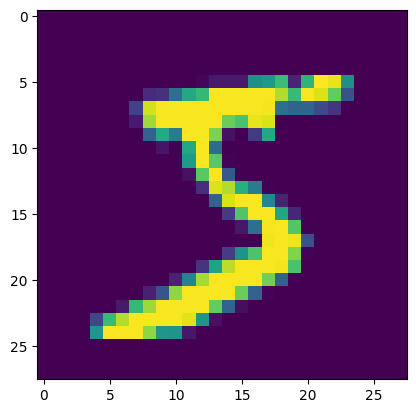

In [75]:
import matplotlib.pyplot as plt
 
plt.imshow(x_train[0]);

In [76]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [77]:
#conv 층
input_layer = Input(shape=(28,28,1))
hidden_layer = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')(input_layer)
hidden_layer = BatchNormalization()(hidden_layer)
hidden_layer = MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden_layer)
hidden_layer = Dropout(0.25)(hidden_layer)

### Fully Connected Layer ###
hidden_layer = Flatten()(hidden_layer)
hidden_layer = Dense(512, activation='relu')(hidden_layer) 
hidden_layer = BatchNormalization()(hidden_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)

model = Model(input_layer, output_layer)

model.compile(optimizer='adam', 
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,219,402 (12.28 MB)

 Trainable params: 3,218,314 (12.28 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [78]:
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',
                 patience=3, 
                 verbose=1, 
                 restore_best_weights=True
                 )
history = model.fit(x_train, y_train, epochs=10000, verbose=1,
                 validation_split=0.2,
                 callbacks=[early_stopping]
                 )

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9246 - loss: 0.2584 - val_accuracy: 0.9775 - val_loss: 0.0772
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0647 - val_accuracy: 0.9818 - val_loss: 0.0612
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 0.9838 - val_loss: 0.0584
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 0.9858 - val_loss: 0.0482
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9862 - val_loss: 0.0560
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9874 - val_loss: 0.0476
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9873 - val_loss: 0.0515
Epoch 8/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 

In [91]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_new_image(img_path):
    # 사이즈 조정 (모델 훈련 인풋에 맞춤)
    img = image.load_img(img_path, target_size=(28, 28))  # Color image, adjust target size
    # numpy 배열로 변환.
    img_tensor = image.img_to_array(img)[:,:,0]
    # 정규화(0-1)
    img_tensor = img_tensor.astype('float32') / 255.0
    # Add a batch dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # 모델을 이용, 입력이미지의 숫자 예측
    prediction = model.predict(img_tensor)
    # 예측된(가장 높은 확률을 가진 클래스) 숫자반환
    # digit = np.argmax(prediction)
    digit = prediction
    formatted_prediction = np.round(prediction, decimals=3)

    return formatted_prediction, np.argmax(digit)

In [92]:
#  이미지 예측
img_path ='../06_visualization/stussy.png'
predicted_digit = predict_new_image(img_path)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted digit: (array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), 0)
